In [700]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import urllib.request
import wget

# Interpoación de Lagrange

# Punto 4

In [344]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Parabolico.csv'
url ='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [4]:
#url ='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

In [5]:
#filename='Data/Parabolico.csv'

In [6]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [7]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[1.4 3.5 5.6] [0.40079549 0.5941281  0.29802796]


In [8]:
Diff = np.zeros((len(X),len(X)))
Diff[:,0] = Y
Diff

for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
Diff

array([[ 0.40079549,  0.        ,  0.        ],
       [ 0.5941281 ,  0.19333261,  0.        ],
       [ 0.29802796, -0.29610015, -0.48943276]])

In [63]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [64]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [140]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)


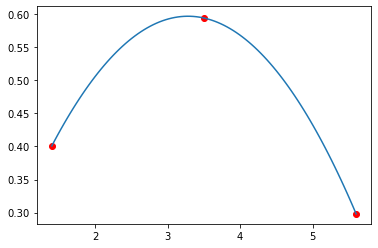

In [141]:
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)

In [143]:
x = sym.Symbol('x',real=True)

In [249]:
y = Interpolate(x,X,Y)
y

0.400795493181974*(1.33333333333333 - 0.238095238095238*x)*(1.66666666666667 - 0.476190476190476*x) + 0.594128102489774*(2.66666666666667 - 0.476190476190476*x)*(0.476190476190476*x - 0.666666666666667) + 0.298027955239382*(0.238095238095238*x - 0.333333333333333)*(0.476190476190476*x - 1.66666666666667)

In [323]:
r = sym.simplify(y)
print(type(r))
r

<class 'sympy.core.mul.Mul'>


x*(0.363970234266202 - 0.0554912422401579*x)

In [324]:
#print(x)
d=sym.diff(r)
print(d)
x_maxy=sym.solve(d,x)


0.363970234266202 - 0.110982484480316*x


In [325]:
#for ih=r
func = sym.lambdify([x],r,'numpy')
#print(type(x))
x_maxy=x_maxy[0]
y_max=(func(x_maxy))
print(x_maxy,y_max)
#np.roots(r)

3.27952862084968 0.596825400206688


In [360]:
g=-9.8

t=math.sqrt(-2*y_max/g)
print(t)
vx=(x_maxy)/t
vy=-g*t
t_O=X[0]/vx

print(vx,vy)

0.3490001462506821
9.39692620785907 3.420201433256685


In [361]:
v_r=vx**2+vy**2
v=np.array(math.sqrt(v_r))
print('Velocidad_Inicial')
print(v)

Velocidad_Inicial
9.999999999999984


In [362]:
valor=math.atan(vy/vx)*180/np.pi
valor

20.000000000000018

# Punto 5

In [703]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Newton_Gregory.csv'
url ='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    arch = wget.download(url,file)
    
else:
    arch = file

In [704]:
Datos = pd.read_csv(arch)
Datos

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [705]:
X = np.float64(Datos.X)
Y = np.float64(Datos.Y)
print(X,Y)

[0.  1.5 2.  3.8 4.2 5.9] [-18. -13.   0.   5.   3.  10.]


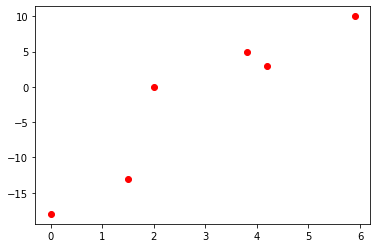

In [706]:
plt.scatter(X,Y,color='r',marker='o')

In [707]:
Diff = np.zeros((len(X),len(X)))
Diff[:,0] = Y
print(Diff[0,0])

for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] =( Diff[j,i-1] - Diff[j-1,i-1])/(X[j] - X[j-i])
    print(Diff[i,i])
Diff

-18.0
3.3333333333333335
11.333333333333334
-5.639460971268751
1.9213235841763683
-0.34145435774264016


array([[-18.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-13.        ,   3.33333333,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  26.        ,  11.33333333,   0.        ,
          0.        ,   0.        ],
       [  5.        ,   2.77777778, -10.09661836,  -5.63946097,
          0.        ,   0.        ],
       [  3.        ,  -5.        ,  -3.53535354,   2.43009808,
          1.92132358,   0.        ],
       [ 10.        ,   4.11764706,   4.34173669,   2.01976673,
         -0.09325713,  -0.34145436]])

In [711]:
def NewtonInterpolation(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(X)))
    h = X[1] - X[0]
    
    Diff[:,0] = Y
    
    poly = 1.0
    for i in range(1,len(X)):
        #print(i)
        poly *= (x - X[i-1])
       
        for j in range(i,len(X)): 
            
            Diff[j,i] =( Diff[j,i-1] - Diff[j-1,i-1])/(X[j] - X[j-i])
            
        sum_ += (poly*Diff[i,i])
    return sum_

In [712]:
xt = np.linspace(X[0],X[-1],100)
#print(xt)
yt = []

for i in range(len(xt)):
    yt.append(NewtonInterpolation(X,Y,xt[i]))
#print(yt)

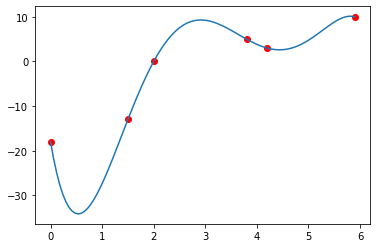

In [713]:
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)